Aluno: Leonardo Pessôa Bandeira Lacerda - 119110415

In [45]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import math
import pandas as pd
import importlib.util
from scipy.signal import find_peaks
import numpy.lib.scimath as sp

def FFT(signal):
    
    n = len(signal) # Gets the lenght of the signal, this is important since
    # This signal will be split in half recursivly

    if n == 1: return signal 

    even = signal[::2] # Splitting the even part 
    odd =  signal[1::2] # Splitting the odd part

    yeven = FFT(even) # Recursive call for the even part
    yodd = FFT(odd) # Recursive call for the odd part


    w = np.exp(2*np.pi*1j/n) 
    y = [0]*n
    for i in range(int(n/2)): # generating the fourier transform
        y[i] = yeven[i] + (w**i)*yodd[i]
        y[i + int(n/2)] = yeven[i] - (w**i)*yodd[i]

    return y

In [46]:
# Some parameters and signal generation

frequency = 3200*4
T = 1/(np.gcd.reduce([3200,600,300]))
time = 10*T
samples = int((frequency*time))

n = np.linspace(0, time, samples)
t = np.linspace(0, time, 8192)


signal = np.cos(2*np.pi*3200*t) +  0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)
sampled_signal = np.cos(2*np.pi*3200*n) +  0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)

print("The number of samples are:", samples)
samples = 2048
print("using the next power of two we get", samples) # Since FFTs are based on an base 2 split recursivly
# we need to give the signal an power of two 

The number of samples are: 1280
using the next power of two we get 2048


In [47]:
# Using my function to generate FFT
fft = FFT(sampled_signal)

Text(0, 0.5, 'Amplitude')

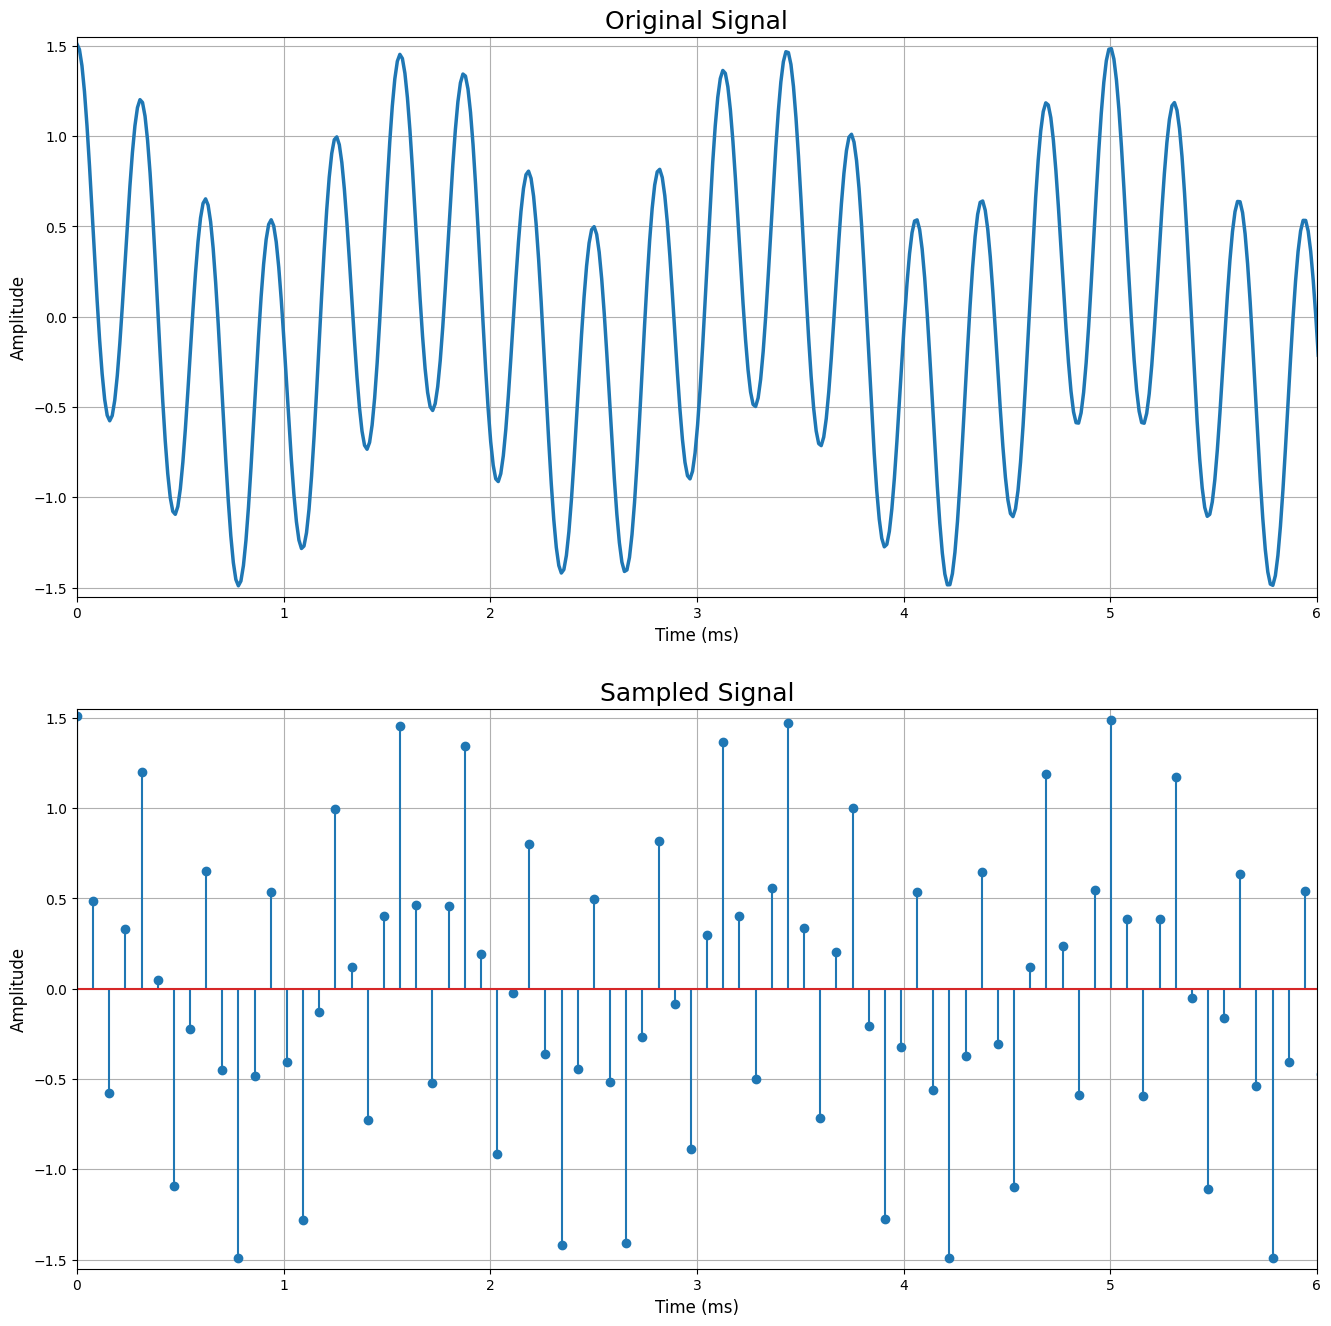

In [48]:
figure, fig = plt.subplots(2, 1, figsize=(16,16))

fig[0].plot(t*1e3, signal, linewidth = 2.5)
fig[0].set_xlim(0,6)
fig[0].grid()
fig[0].set_ylim(-1.55,1.55)
fig[0].set_title("Original Signal", fontsize= 18)
fig[0].set_xlabel("Time (ms)", fontsize = 12)
fig[0].set_ylabel("Amplitude", fontsize = 12)

fig[1].stem(n*1e3, sampled_signal)
fig[1].set_xlim(0,6)
fig[1].grid()
fig[1].set_ylim(-1.55,1.55)
fig[1].set_title("Sampled Signal", fontsize= 18)
fig[1].set_xlabel("Time (ms)", fontsize = 12)
fig[1].set_ylabel("Amplitude", fontsize = 12)

Text(0, 0.5, 'Amplitude')

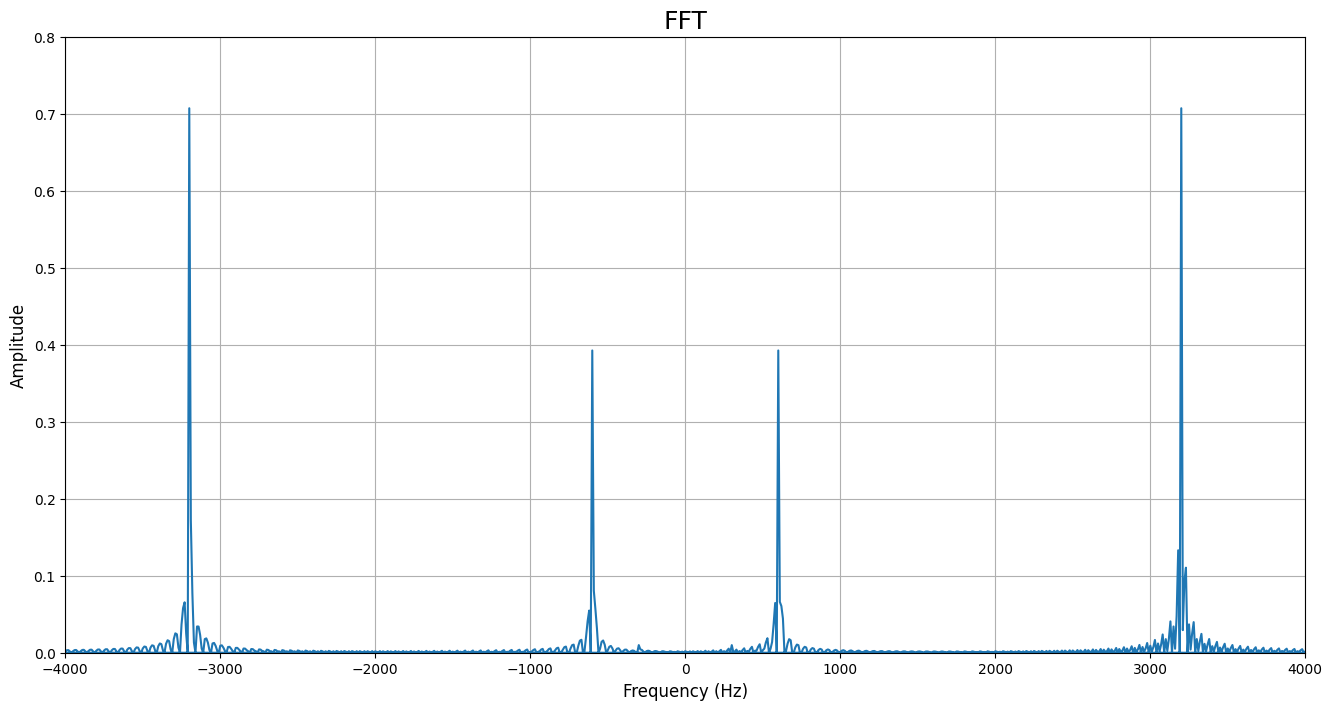

In [49]:
figure = plt.figure(figsize=(16,8))
freq = np.fft.fftfreq(len(fft))

plt.plot(freq*frequency, np.absolute(fft)/np.max(fft))
plt.xlim(-4000, 4000)
plt.grid()
plt.ylim(0,0.8)
plt.title("FFT", fontsize= 18)
plt.xlabel("Frequency (Hz)", fontsize = 12)
plt.ylabel("Amplitude", fontsize = 12)
